In [10]:
import os, pickle 
import numpy as np
import tensorflow as tf

In [70]:
from importlib import reload
import helper_funcs;reload(helper_funcs)
from helper_funcs import *

from mri_utils import get_MRI_CVAE_3D,get_MRI_CCVAE_3D
import bc_mri_ae_utils; #reload(bc_mri_ae_utils)
from bc_mri_ae_utils import *

In [19]:
weights = show_available_weights();

00:16dim_noDis_evBatch
01:Jan12_disentagled_l16
02:Jan24_d16_dis_flipped_b5g20
03:Jan24_d16_dis_flipped_b5g20_earlyStop
04:Jan4th
05:fake_abide
06:fake_abide_flipped
07:fake_abide_flipped_disentangled
08:play
09:play_FLIP_3d_dis
10:play_flip_3d_dis
11:play_noflip


In [18]:
fn = weights[6]

latent_dim = 16;batch_size = 64;beta = 1;gamma=1;disentangle=True
cvae, cvae_fg, z_encoder, s_encoder, cvae_decoder = get_MRI_CCVAE_3D(latent_dim=latent_dim,beta=beta, disentangle=disentangle, gamma=gamma, bias=True)

ABIDE_data = np.load('/mmfs1/data/aglinska/3d_grassy_mnist/fake_abide.npy')

loss = list()
if os.path.exists(fn+'_loss.pickle'):
    print('loading weights')
    loss = pickle.load(open(fn+'_loss.pickle','rb'))
    cvae.load_weights(fn)
print(fn)

loading weights
/mmfs1/data/aglinska/tf_outputs/CVAE/fake_abide_flipped


In [26]:
df = pd.read_csv('/mmfs1/data/aglinska/df_abide.csv')

In [31]:
bg_space = z_encoder(ABIDE_data)[2]
sl_space = s_encoder(ABIDE_data)[2]

In [48]:
recon_all = cvae_decoder(np.hstack((bg_space,sl_space)))[:,:,:,:,0]
recon_sl = cvae_decoder(np.hstack((np.zeros(shape=sl_space.shape),sl_space)))[:,:,:,:,0]
recon_bg = cvae_decoder(np.hstack((bg_space,np.zeros(shape=sl_space.shape))))[:,:,:,:,0]

In [66]:
recon_sl.shape

TensorShape([982, 64, 64, 64])

In [67]:
umap_recon_sl = dim_reduce(sl_space,method='UMAP')
umap_recon_bg = dim_reduce(bg_space,method='UMAP')

In [78]:
def plot_four(s=0,k=32):
    plt.figure(figsize=np.array((20,4))*.75)
    plt.subplot(1,4,1)
    plt.imshow(ABIDE_data[s,:,:,k]);plt.xticks([]);plt.yticks([]);plt.title('input')

    plt.subplot(1,4,2)
    plt.imshow(recon_all[s,:,:,k]);plt.xticks([]);plt.yticks([]);plt.title('reconstruction')

    plt.subplot(1,4,3)
    plt.imshow(recon_sl[s,:,:,k]);plt.xticks([]);plt.yticks([]);plt.title('salient')

    plt.subplot(1,4,4)
    plt.imshow(recon_bg[s,:,:,k]);plt.xticks([]);plt.yticks([]);plt.title('background')
    plt.subplots_adjust(wspace=.05)

array([231, 353, 603, 430, 528])

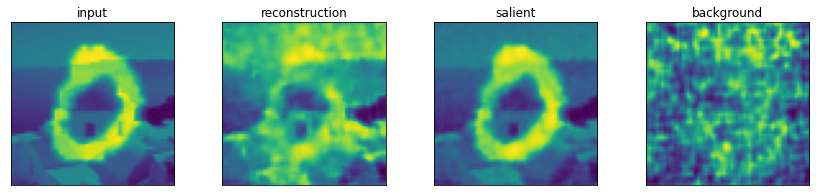

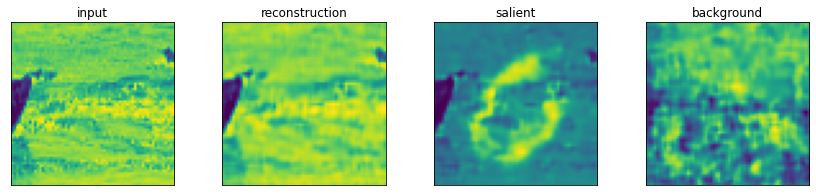

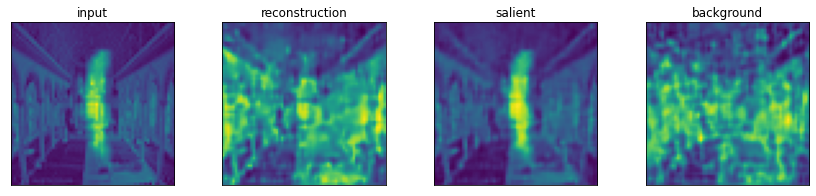

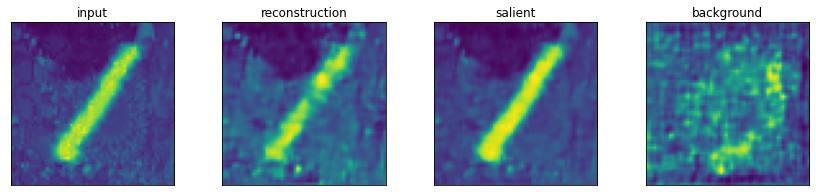

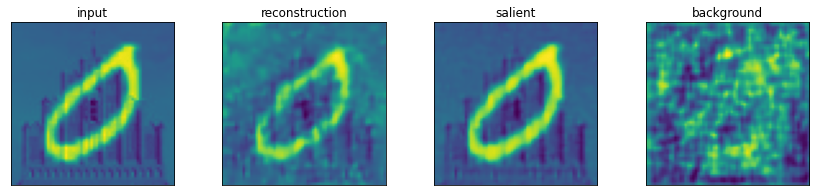

In [84]:
for s in np.random.randint(low=0,high=900,size=5):
    plot_four(s,k=32)

982


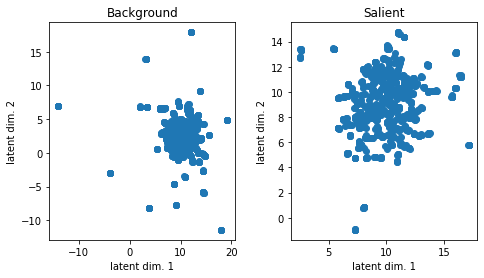

In [75]:
cscatter([umap_recon_bg,umap_recon_sl])